In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [34]:
raw_csv_data = pd.read_csv(r'C:\Users\Admin\Desktop\TM SERIES\Ontario sample.csv') 
df=raw_csv_data.copy()

In [36]:
df.Date.describe()

count           111
unique          111
top       4/17/2020
freq              1
Name: Date, dtype: object

In [37]:
df

,Date,Cases,RR,GP,Parks,Transit,Workplace,Residential
0,3/1/2020,15,0.11,0.10,0.23,0.04,0.06,-0.01
1,3/2/2020,20,0.02,0.04,0.00,-0.02,0.04,0.00
2,3/3/2020,20,0.01,0.03,-0.06,0.00,0.04,0.00
3,3/4/2020,22,0.04,0.04,0.01,0.00,0.04,0.00
4,3/5/2020,22,0.06,0.06,0.21,0.02,0.00,0.00
5,3/6/2020,28,-0.03,-0.04,-0.04,-0.03,0.03,0.01
6,3/7/2020,28,0.10,0.09,0.41,0.08,0.09,-0.01
7,3/8/2020,31,0.13,0.10,0.86,0.06,0.05,-0.01
8,3/9/2020,34,0.04,0.05,0.41,-0.03,0.03,0.01
9,3/10/2020,42,0.01,0.04,-0.02,-0.04,0.03,0.01


In [38]:
df.Date = pd.to_datetime(df.Date)

In [39]:
df.head()

,Date,Cases,RR,GP,Parks,Transit,Workplace,Residential
0,2020-03-01,15,0.11,0.10,0.23,0.04,0.06,-0.01
1,2020-03-02,20,0.02,0.04,0.00,-0.02,0.04,0.00
2,2020-03-03,20,0.01,0.03,-0.06,0.00,0.04,0.00
3,2020-03-04,22,0.04,0.04,0.01,0.00,0.04,0.00
4,2020-03-05,22,0.06,0.06,0.21,0.02,0.00,0.00


In [28]:
df

,Date,Cases,RR,GP,Parks,Transit,Workplace,Residential
0,2020-03-01,15,0.11,0.10,0.23,0.04,0.06,-0.01
1,2020-03-02,20,0.02,0.04,0.00,-0.02,0.04,0.00
2,2020-03-03,20,0.01,0.03,-0.06,0.00,0.04,0.00
3,2020-03-04,22,0.04,0.04,0.01,0.00,0.04,0.00
4,2020-03-05,22,0.06,0.06,0.21,0.02,0.00,0.00
5,2020-03-06,28,-0.03,-0.04,-0.04,-0.03,0.03,0.01
6,2020-03-07,28,0.10,0.09,0.41,0.08,0.09,-0.01
7,2020-03-08,31,0.13,0.10,0.86,0.06,0.05,-0.01
8,2020-03-09,34,0.04,0.05,0.41,-0.03,0.03,0.01
9,2020-03-10,42,0.01,0.04,-0.02,-0.04,0.03,0.01


In [41]:
df.set_index('Date', inplace=True)
df.index.freq = 'D'

In [42]:
df

,Cases,RR,GP,Parks,Transit,Workplace,Residential
Date,,,,,,,
2020-03-01,15,0.11,0.10,0.23,0.04,0.06,-0.01
2020-03-02,20,0.02,0.04,0.00,-0.02,0.04,0.00
2020-03-03,20,0.01,0.03,-0.06,0.00,0.04,0.00
2020-03-04,22,0.04,0.04,0.01,0.00,0.04,0.00
2020-03-05,22,0.06,0.06,0.21,0.02,0.00,0.00
2020-03-06,28,-0.03,-0.04,-0.04,-0.03,0.03,0.01
2020-03-07,28,0.10,0.09,0.41,0.08,0.09,-0.01
2020-03-08,31,0.13,0.10,0.86,0.06,0.05,-0.01
2020-03-09,34,0.04,0.05,0.41,-0.03,0.03,0.01


In [40]:
df.Date.describe()

count                     111
unique                    111
top       2020-03-13 00:00:00
freq                        1
first     2020-03-01 00:00:00
last      2020-06-19 00:00:00
Name: Date, dtype: object

In [43]:
df

,Cases,RR,GP,Parks,Transit,Workplace,Residential
Date,,,,,,,
2020-03-01,15,0.11,0.10,0.23,0.04,0.06,-0.01
2020-03-02,20,0.02,0.04,0.00,-0.02,0.04,0.00
2020-03-03,20,0.01,0.03,-0.06,0.00,0.04,0.00
2020-03-04,22,0.04,0.04,0.01,0.00,0.04,0.00
2020-03-05,22,0.06,0.06,0.21,0.02,0.00,0.00
2020-03-06,28,-0.03,-0.04,-0.04,-0.03,0.03,0.01
2020-03-07,28,0.10,0.09,0.41,0.08,0.09,-0.01
2020-03-08,31,0.13,0.10,0.86,0.06,0.05,-0.01
2020-03-09,34,0.04,0.05,0.41,-0.03,0.03,0.01


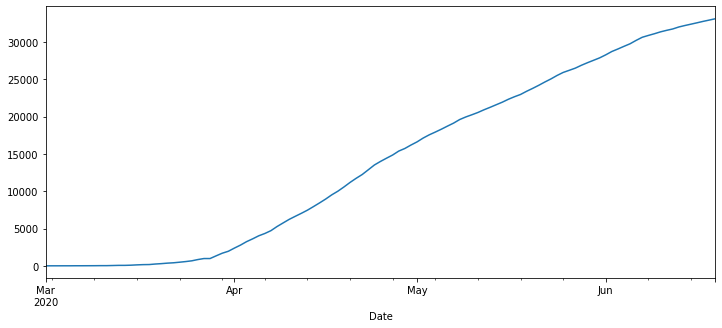

In [44]:
df['Cases'].plot(figsize=(12,5));

In [45]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [46]:
adf_test(df['Cases'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.923414
p-value                   0.321128
# lags used               4.000000
# observations          106.000000
critical value (1%)      -3.493602
critical value (5%)      -2.889217
critical value (10%)     -2.581533
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


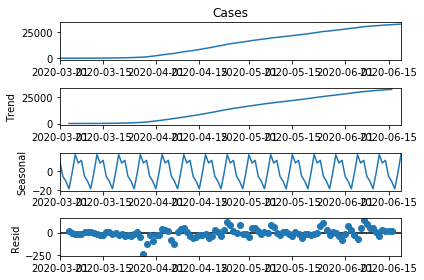

In [47]:
result = seasonal_decompose(df['Cases'])
result.plot();

In [50]:
from statsmodels.tsa.statespace.tools import diff
df['d1'] = diff(df['Cases'],k_diff=2)

In [51]:
adf_test(df['d1'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.126151e+01
p-value                 1.617705e-20
# lags used             1.000000e+00
# observations          1.070000e+02
critical value (1%)    -3.492996e+00
critical value (5%)    -2.888955e+00
critical value (10%)   -2.581393e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [78]:
stepwise_fit = auto_arima(df['Cases'], start_p=0, start_q=0,
                          max_p=4, max_q=4,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=1247.392, BIC=1252.774, Time=0.012 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=1239.903, BIC=1247.977, Time=0.134 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=1232.106, BIC=1240.180, Time=0.067 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=False]; AIC=1245.444, BIC=1248.135, Time=0.008 seconds
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=1233.560, BIC=1244.325, Time=0.094 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=1233.047, BIC=1243.813, Time=0.126 seconds
Fit ARIMA(1,2,2)x(0,0,0,0) [intercept=True]; AIC=1233.854, BIC=1247.311, Time=0.194 seconds
Total fit time: 0.643 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  111
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -613.053
Date:                Thu, 25 Jun 2020   AIC                           1232.106
Time:                        04:52:15   BIC                           1240.180
Sample:                             0   HQIC                          1235.380
                                - 111                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6410      3.626      0.453      0.651      -5.466       8.748
ma.L1         -0.4573      0.079     -5.766      0.000      -0.613      -0.302
sigma2      4485.7848    437.131     10.262      0.000    3629.024    5342.546
===================================================================================
Ljung-Box (Q):                       39.73   Jarque-Bera (JB):                51.10
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.63
Prob(H) (two-sided):                  0.32   Kurtosis:                         6.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
train = df.iloc[:104]
test = df.iloc[104:]

In [80]:
model = ARIMA(train['Cases'],order=(0,2,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Cases   No. Observations:                  102
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -576.279
Method:                       css-mle   S.D. of innovations             68.699
Date:                Thu, 25 Jun 2020   AIC                           1158.558
Time:                        04:53:40   BIC                           1166.433
Sample:                    03-03-2020   HQIC                          1161.747
                         - 06-12-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9921      3.763      0.529      0.596      -5.382       9.367
ma.L1.D2.Cases    -0.4515      0.089     -5.047      0.000      -0.627      -0.276
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.2147           +0.0000j            2.2147            0.0000
-----------------------------------------------------------------------------
"""

In [72]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

In [81]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')

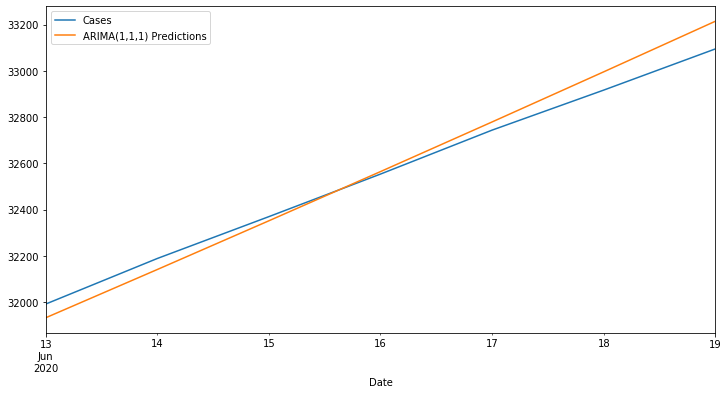

In [82]:
# Obtain predicted values
ax = test['Cases'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [85]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Cases'], predictions)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

ARIMA(1,1,1) RMSE Error: 63.26750449
